Heart Disease Prediction Model  
Using the dataset to accurately predict the likelihood of a new patient having heart disease in the future.

In [1]:
# Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data
DATA = pd.read_csv("heart_disease_prediction.csv")
DATA.head(5)  # Show the first 5 rows of the dataset 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


EDA - Exploratory Data Analysis

In [3]:
DATA.info()  # provides data type of each column, no. of column, memory usage, and the no. of records in the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
DATA.shape  # provides the no. of records(rows) and columns

(918, 12)

In [5]:
DATA.isnull()  # checking for null values

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
DATA.isnull().sum()  # Finding the total number of null values 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
DATA.describe()  # summarizes the dataset's statistical properties, such as count, mean, min, and max

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Noted Values: 
* Avg. age of patients - around 54
* Minimum value of RestingBP and Cholesterol is shown to be - 0 (?)
* Also the median value of Cholesterol is higher than mean by ~ 24.2
* The no. of missing values - 0 (but certain indexed are field with 0 values)

In [8]:
DATA[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'HeartDisease']].corr()  #.corr() - Displays the correlation between different variables in the dataset
# In the above case we have only created a subset of the dataset with the features with numeric value and can provide any valuable info.

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.400421
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,1.000000


Creating Barchart for each categorical column in dataset ( Including HeartDisease and FastingBS )

C:\Users\Rohit\AppData\Local\Temp\ipykernel_6052\2268266477.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index.astype(str), y=category_counts.values, palette='viridis')


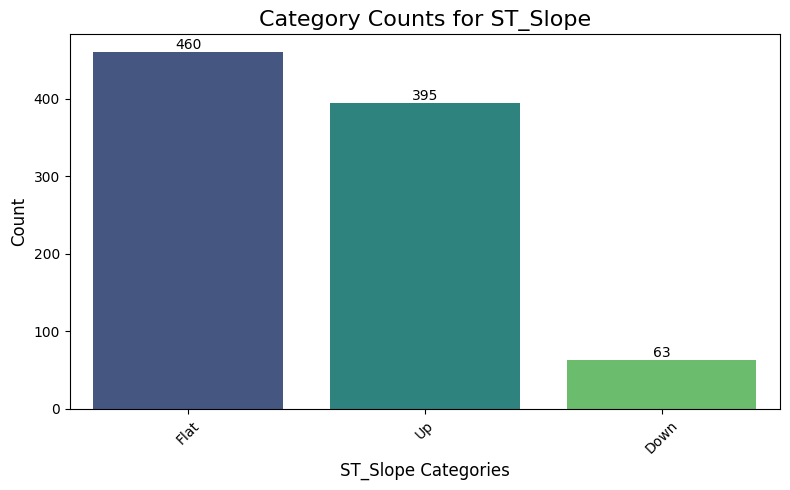

C:\Users\Rohit\AppData\Local\Temp\ipykernel_6052\2268266477.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index.astype(str), y=category_counts.values, palette='viridis')


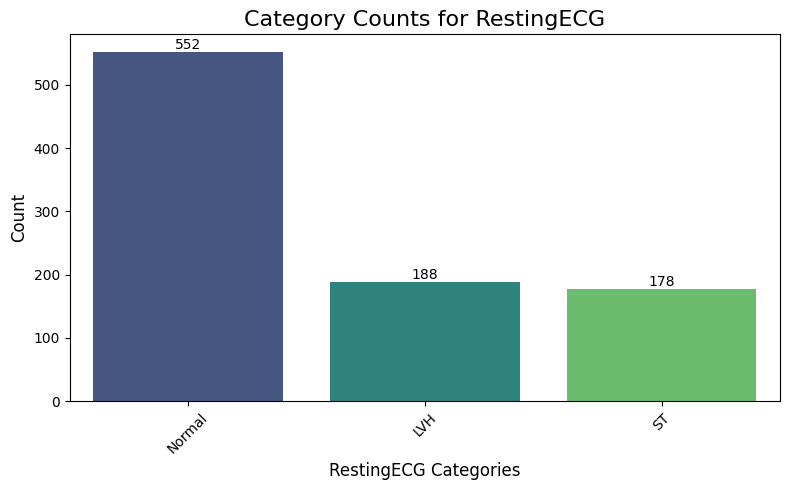

C:\Users\Rohit\AppData\Local\Temp\ipykernel_6052\2268266477.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index.astype(str), y=category_counts.values, palette='viridis')


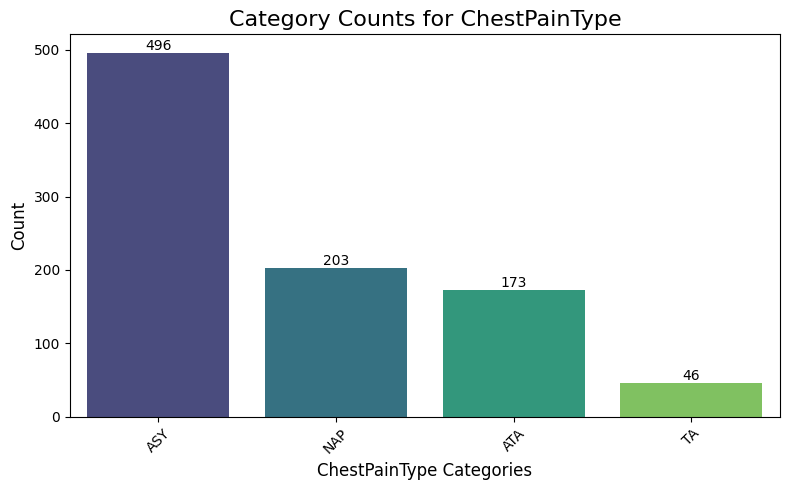

C:\Users\Rohit\AppData\Local\Temp\ipykernel_6052\2268266477.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index.astype(str), y=category_counts.values, palette='viridis')


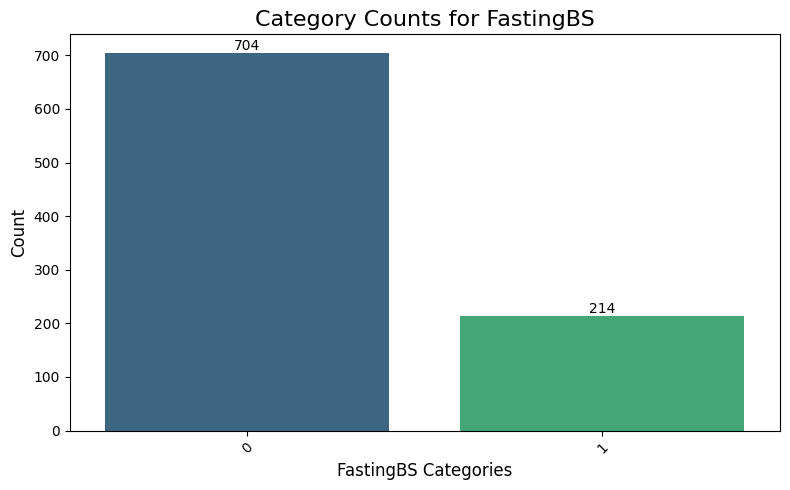

C:\Users\Rohit\AppData\Local\Temp\ipykernel_6052\2268266477.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index.astype(str), y=category_counts.values, palette='viridis')


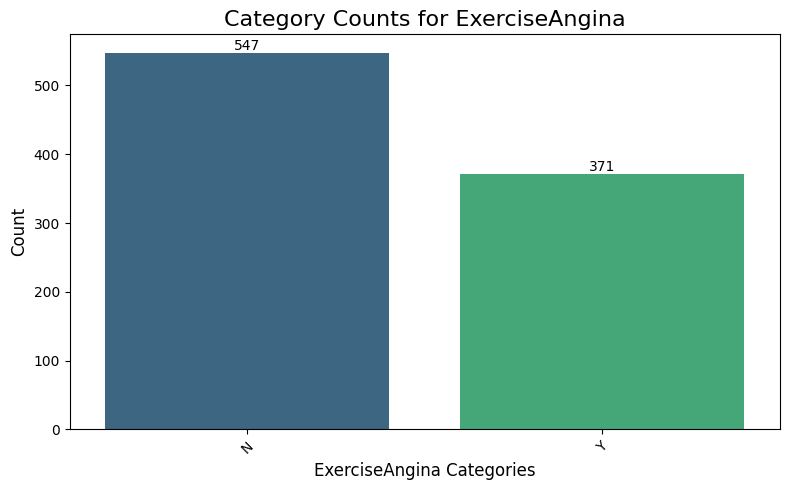

C:\Users\Rohit\AppData\Local\Temp\ipykernel_6052\2268266477.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index.astype(str), y=category_counts.values, palette='viridis')


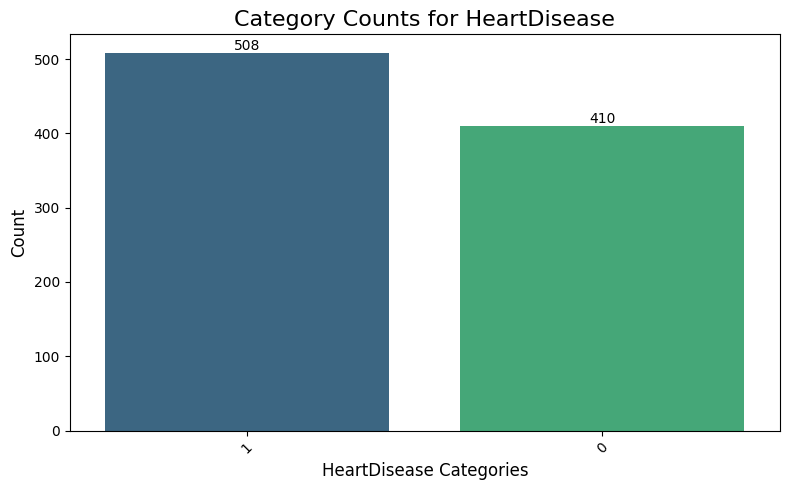

C:\Users\Rohit\AppData\Local\Temp\ipykernel_6052\2268266477.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index.astype(str), y=category_counts.values, palette='viridis')


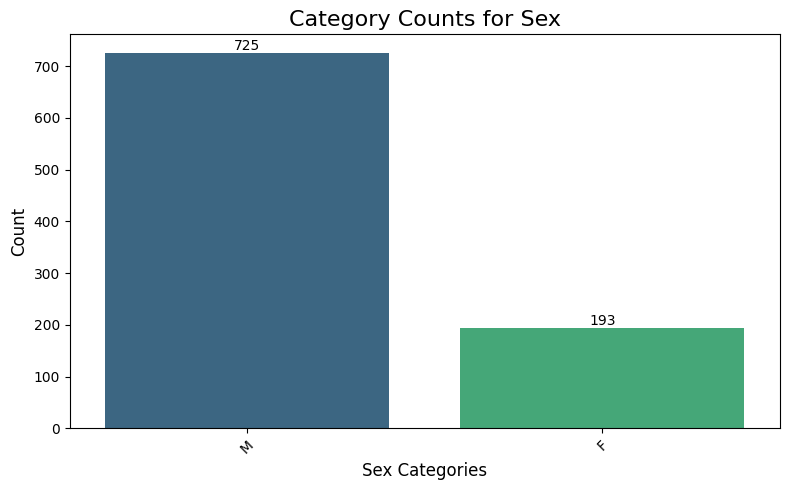

In [10]:
categorical_columns = DATA.select_dtypes(include=['object']).columns.tolist()  # identify categorical columns
binary_columns = [col for col in DATA.columns if set(DATA[col].dropna().unique()) <= {0,1}]  # Identify columns with only 0 and 1 values 
# .dropna() is used to remove values that contains NULL value
# .unique() is used return a array of unique values
all_categorical_columns = list(set(categorical_columns + binary_columns))

# create the barcharts
for column in all_categorical_columns:
    plt.figure(figsize = (8,5))  # helps in creating a new figure 
    category_counts = DATA[column].value_counts()  # used to count the occurences of unique values in a column
    sns.barplot(x=category_counts.index.astype(str), y=category_counts.values, palette='viridis')

    # Add labels and title
    plt.title(f'Category Counts for {column}', fontsize=16)
    plt.xlabel(f'{column} Categories', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Add data labels
    for i, value in enumerate(category_counts.values):
        plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()